<a href="https://colab.research.google.com/github/jikku007/Machine-Learning-Masters/blob/master/Linear_Regression_JJT_Jan_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data=pd.read_csv(r'/content/Advertising.csv',index_col=0)

In [ ]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Domain Analysis

In [ ]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
## For normally distributed data mean and median(50%) will be almost the same

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [ ]:
data.TV.mean()

147.0425

EDA

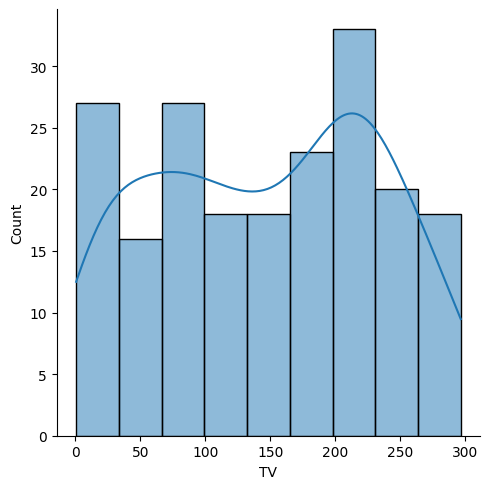

In [ ]:
sns.displot(data.TV,kde=True)

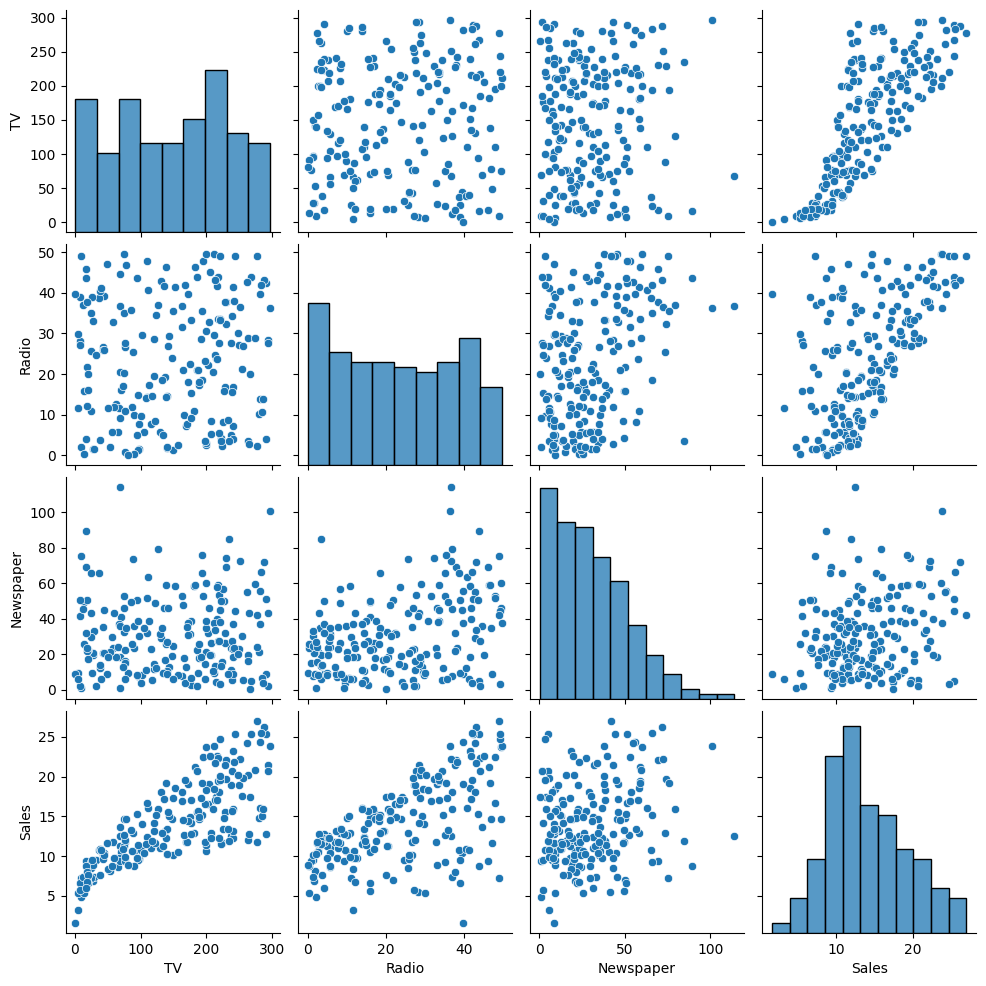

In [ ]:
sns.pairplot(data)

<Axes: ylabel='TV'>

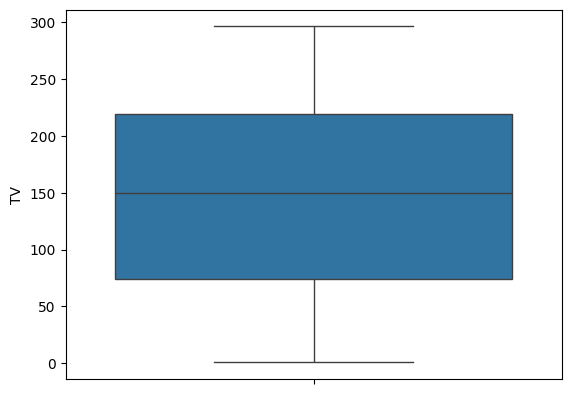

In [ ]:
sns.boxplot(data.TV)

In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


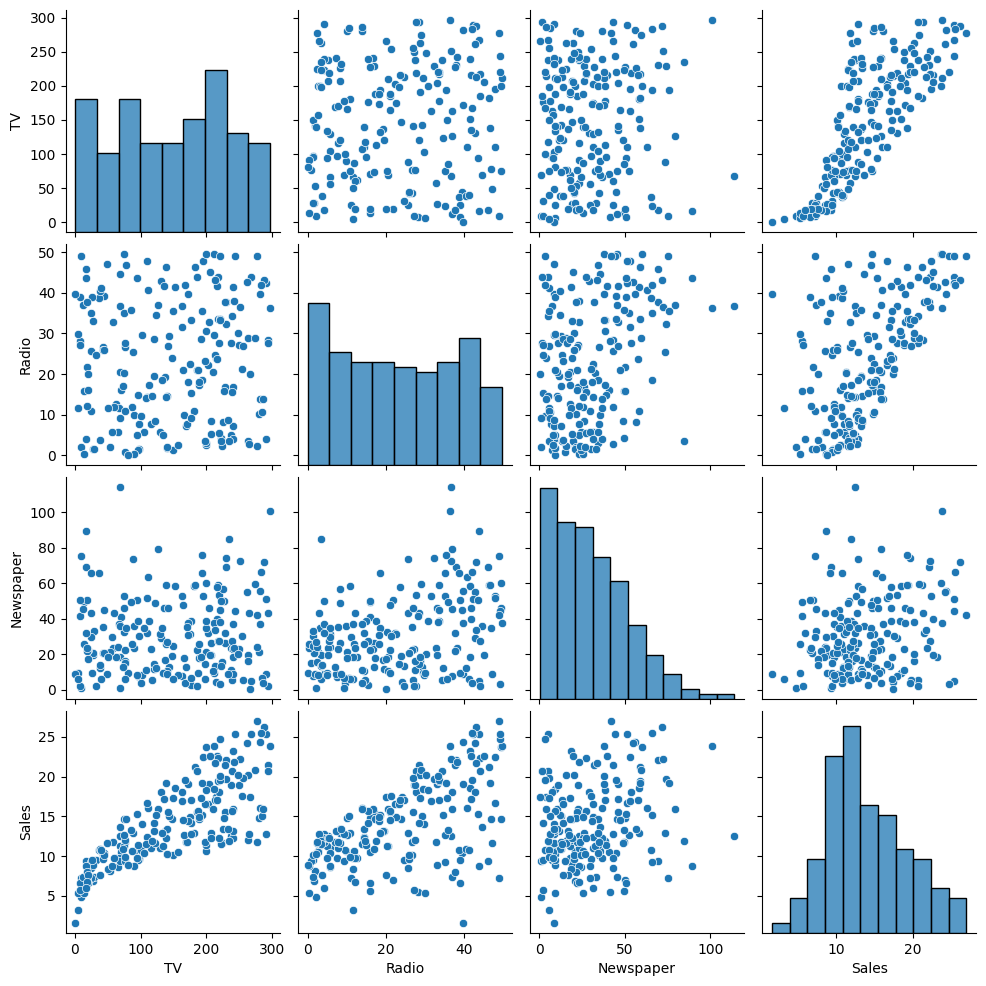

In [ ]:
sns.pairplot(data)

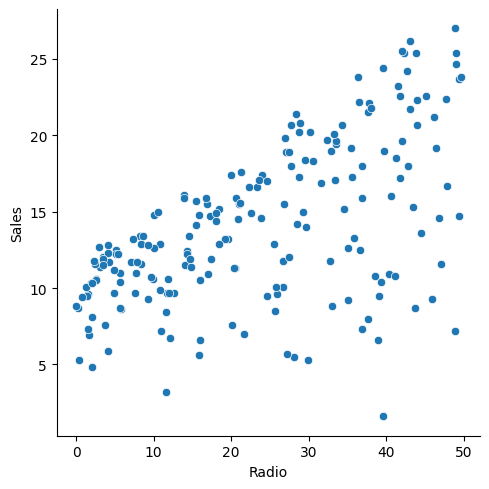

In [8]:
sns.relplot(x="Radio",y="Sales",data=data)

In [ ]:
### Observations from EDA
-We see all features r linearly core lated with the target variable(sales)
-There is also sufficient variability in the graph.
-The featues themselves do not show much corelation with each other which makes them independant of each other

In [9]:
import statsmodels.api as sm

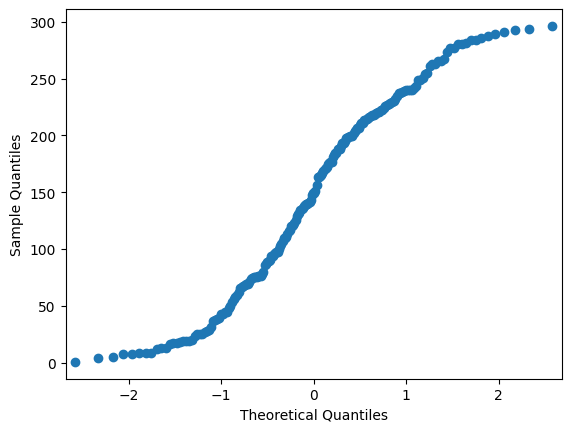

In [14]:
sm.qqplot(data.TV)
plt.show()

In [16]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

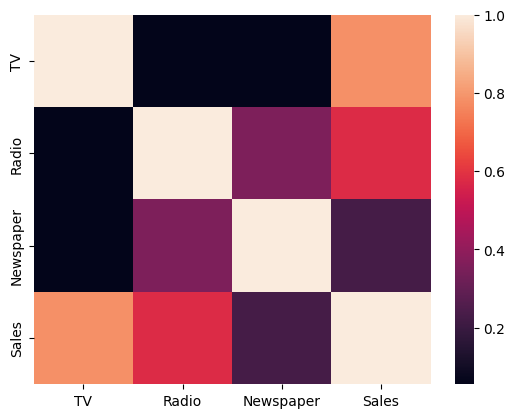

In [17]:
sns.heatmap(data.corr())

Data Pre processing and Feature Engineering

In [ ]:
## Data Pre processing and Feature Engineering
- Check for null values/outliers and impute data
- Scaling(extremely variable range)/Encoding(categorical features)
- Selection of features(no dropping of features)


<Axes: ylabel='TV'>

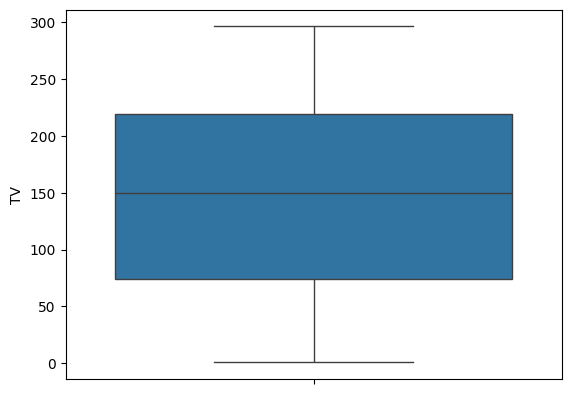

In [18]:
sns.boxplot(data.TV)

<Axes: xlabel='Newspaper'>

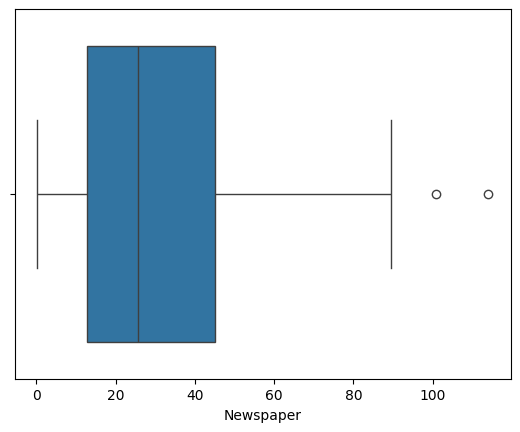

In [26]:
sns.boxplot(x='Newspaper',data=data)

In [27]:
data.loc[(data.Newspaper>90),'Newspaper']=data.Newspaper.mean()

Model Creation

In [28]:
X=data.drop('Sales',axis=1)
Y=data.Sales

In [30]:
##Train test
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
print(len(X),len(x_train),len(x_test))

200 160 40


In [36]:
print(len(Y),len(y_train),len(y_test))

200 160 40


In [37]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

Prediction

In [39]:
y_pred=LR.predict(x_test)

In [40]:
y_pred

array([16.31071413, 20.81547718, 21.63100248, 10.38151084, 22.2594335 ,
       12.91570592, 21.10897767,  7.39576761, 13.745555  , 15.16040462,
        9.01971123,  6.55353139, 14.21371067,  8.81603871,  9.69052626,
       12.15997035,  8.52539231, 16.3615773 , 10.17719281, 18.97871928,
       19.44682127, 12.90975642, 12.26592883, 21.22036368,  7.85248249,
        5.74221891, 20.78037972, 12.03904639,  9.12692787,  8.45294065,
       12.55078725,  9.95269624, 21.28772027, 11.84890552, 18.36487856,
       20.30431617, 14.00467776, 20.8457829 , 11.07111428,  4.47778169])

In [41]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':y_test-y_pred})

In [45]:
df

,Actual,Predicted,Error
96,16.9,16.310714,0.589286
16,22.4,20.815477,1.584523
31,21.4,21.631002,-0.231002
159,7.3,10.381511,-3.081511
129,24.7,22.259434,2.440566
116,12.6,12.915706,-0.315706
70,22.3,21.108978,1.191022
171,8.4,7.395768,1.004232
175,11.5,13.745555,-2.245555
46,14.9,15.160405,-0.260405


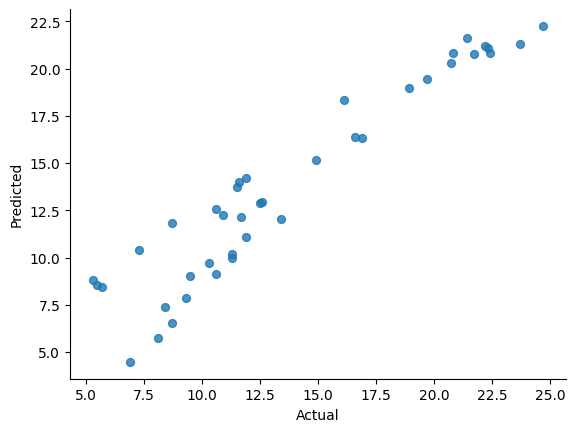

In [43]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

r2 Scoring-Evaluating Model

In [46]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_error

In [48]:
print(mean_squared_error(y_test,y_pred),root_mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))


3.043822223836925 1.7446553309570705 0.9035654099483863 1.4369222504279417


In [49]:
print(r2_score(y_test,y_pred))

0.9035654099483863


In [50]:
r2=r2_score(y_test,y_pred)
r2

0.9035654099483863

In [51]:
adj_r2=1-((1-r2)*(50-1)/(50-3-1))
adj_r2

0.8972761975537158